<H1> Aim of the notebook

A notebook on prediction mpg (miles per galon) taking into account the characteristics of the car

Using the dataset "Car performance data" we will try to create a model to predict car consumption efficiency (MPG or miles per gallon)

Different approaches can be used to tackle the problem, but in this notebook we will do the following:

* Get our data
* Run a exploratory data analysis on our data
* Use linear regression to build our models
* Finish with a conclusion and insights on other models that can be used We will use the linear regression mode to predict the value of mpg and then deduce in which category tha car falls.


<H1> Importing the required libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

<H1> Step 1: Loading the data :

In [2]:
df = pd.read_csv('CarPerformance_Data.csv')
df.head()

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino


<H1> Step2: Exploratory data analysis:

First things first, we will have a look at the data we are dealing with. Before diving into building a model, it is essential that we know more about the variables contained in our dataset.

We will start by checking the data, deal with missing values (if there are any) ,some descriptive statistics, and some vizualisation

<H2> Checking the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   engine        406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   year          406 non-null    int64  
 7   origin        406 non-null    object 
 8   name          406 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.7+ KB


Our dataset contains 406 entries. However, there are 8 missing values in the variable **mpg** and 6 missing values in the variable **horsepower** . Since the number of missing values is low, we decided to delete the observations with missing values.

In [4]:
df=df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   engine        392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Our dataset now contains 392 observations.
Next, we are going to look at the distribution of our data by showing some summary statistics about the data set

<H2> Summary Statistics

In [6]:
df.describe()

,mpg,cylinders,engine,horsepower,weight,acceleration,year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


* The mean value for mpg is is 23.445918
* 50% of the vehicules in our sample have a mpg less than 22.75 (more than half of the cars are efficient)

<H2> Data vizualisation

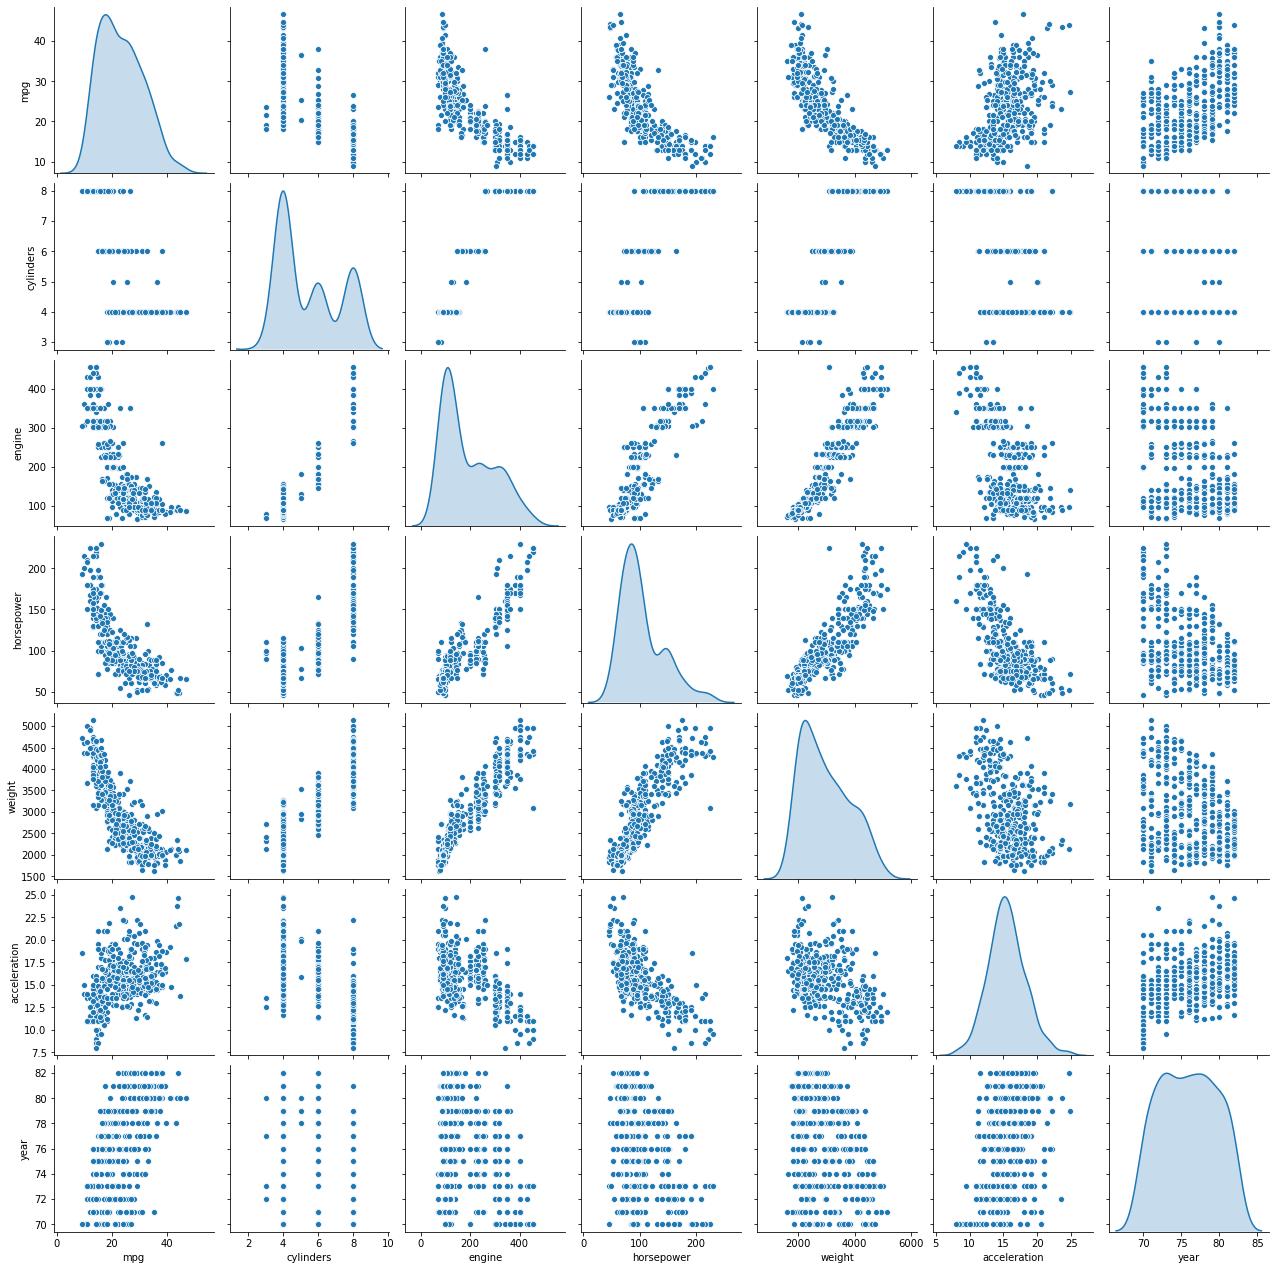

In [7]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.pairplot(df, diag_kind='kde');

<H2> Variable Correlation:

In [8]:
cor=df.corr()
cor

,mpg,cylinders,engine,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
engine,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


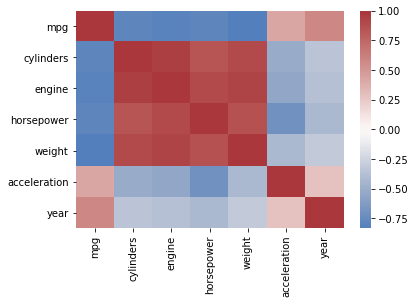

In [9]:
sns.heatmap(cor,center=0,cmap="vlag")

Looking at the result, we can draw some conclusions about our dataset:
* **mpg** is strongly correlated with **cylinders**, **engine** , **horsepower** and **weight** .An increase in their values means a decrease in the mileage per gallon which seems right: a heavy vehicule, with a powerful engine and great horsepower would consume more energy, thus the low mileage per gallon
* The independent variables that we are intending to use in our regression are also correlated.We suspect a multicollinearity. We will test and correct the eventual problem as we come further down our analysis.


<H1> Step 3:Building the model:

<H2> I - Multiple Linear Regression

Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. For all values of our independent variables (x1,x2,x3....xn) is associated with a value of the dependent variable y
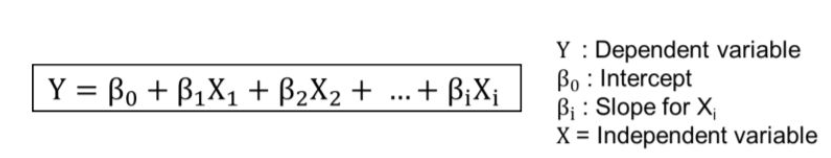

The goal of our model is to look for the coefficient related to each independent variable. we will be using [the Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) to estimate our parameters.
But first, we will encode the variable **origin** using the dummy variables. We will also drop the variable **name** to keep things simple.

<H3> Dummy variables

In [10]:
Y=df['mpg']
X=df.drop(['mpg','name'],axis=1)
X=pd.get_dummies(X, columns=["origin"])
X.head()

,cylinders,engine,horsepower,weight,acceleration,year,origin_American,origin_European,origin_Japanese
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0


<H3> Creating our Train and Test sets:

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=1/5,random_state=0)

Using the statsmodels library we will fit our model using the linear regression.

In [12]:
import statsmodels.formula.api as smf
df_train=pd.concat([y_train, X_train], axis = 1)
reg = smf.ols('mpg ~ X_train', data = df_train)

In [13]:
res=reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     172.9
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          2.54e-108
Time:                        23:47:10   Log-Likelihood:                -818.15
No. Observations:                 313   AIC:                             1654.
Df Residuals:                     304   BIC:                             1688.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.9946      3.879     -2.834      0.0

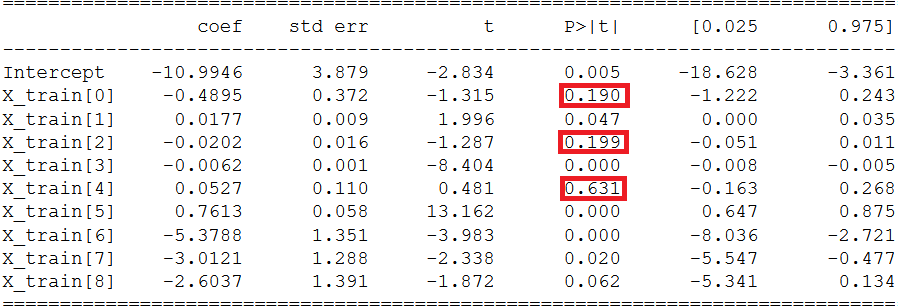

The value of our R-squared is 82% . However the p_values of a number of independent is far greater than 5%. This may lead to an error while interpreting our coefficents and how a change of 1 unit in a variable, all else being equal, can affect **mpg**.
Also, we suspected muticollinearity in our variables, let's have a look at it.


<H3> What is multicollinearity and why is it a problem in a regression analysis:

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high, it can cause problems when you fit the model and interpret the results.

The idea behind a regression is to capture the effect of each variable on our dependent variable.That being said,we aim to change the value of an independent variable whereas the others are constant, and then study the effect. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable(s). Thus, you will not be able to isolate the effect of your independent variable.

More on multicollinearity : https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

<H3> Detect the multicollinearity

To detect the multicolinearity, we are using variable inflation factor or VIF. 
VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
More on VIF and multicollinearity : 
https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

The next part is mainly inspired from the following link : https://www.datasklr.com/ols-least-squares-regression/multicollinearity

In [14]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_temp = sm.add_constant(X_train.drop(['origin_American','origin_European','origin_Japanese'],axis=1))

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

   VIF Factor      features
0       724.0         const
1        10.6     cylinders
2        18.6        engine
3         8.7    horsepower
4        10.0        weight
5         2.4  acceleration
6         1.2          year


In litterature, for large datasets, a VIF value of 10 and above indicates multicollinearity. From the results, we clearly have a multicollinearity problem in our variables.

<H3> Feature selection

Since we have a problem of multicollinearity, we will try to fit a new model by only keeping the variables that have significant effect on **mpg**
Feature selection is the process of identifying and selecting a subset of input variables that are most relevant to the target variable. To do so, we will fit our model recursively. At each iteration,we will drop the variable that is not significant to our model.

In [15]:
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features= cols
print(selected_features)

['weight', 'year', 'origin_American', 'origin_European', 'origin_Japanese']


Now that we have our subset of input variables, let's refit our model.

In [16]:
reg2 = smf.ols('mpg ~ weight + year + origin_American + origin_European + origin_Japanese', data = df_train)
res2=reg2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     342.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          6.39e-112
Time:                        23:47:11   Log-Likelihood:                -821.23
No. Observations:                 313   AIC:                             1652.
Df Residuals:                     308   BIC:                             1671.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.4358      3.311     

Our R-squared has dropped to 81.6% . That is mainly due to the fact that we reduced the number of variables of our model. Also, the p-values are lower than 5%, which means that the coefficients are significantly non null

<H3> Summary of the results:

In [17]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
X_train2=X_train.drop(['horsepower','acceleration','engine','cylinders'],axis=1)
regression_model.fit(X_train2, y_train)
in_sampleScore = regression_model.score(X_train2, y_train)

X_test2=X_test.drop(['horsepower','acceleration','engine','cylinders'],axis=1)
out_sampleScore = regression_model.score(X_test2, y_test)
print(in_sampleScore)
print(out_sampleScore)


0.8162181093908585
0.8215995686096297


Our model has an accuracy of 81.6 on our training sample and 82.1 non the training sample

Min. model accuracy 66.59515731120489
Max. model accuracy 89.75175249060813
Median. model accuracy 81.19994093616303


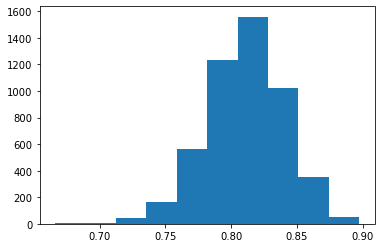

In [18]:
model_accuracies = []
import statistics
for repetition in range(5000):
    (training_inputs,
     testing_inputs,
     training_values,
     testing_values) = train_test_split(X, Y, test_size=0.2)
    training_inputs=training_inputs.drop(['horsepower','acceleration','engine','cylinders'],axis=1)
    testing_inputs=testing_inputs.drop(['horsepower','acceleration','engine','cylinders'],axis=1)
    regression_model = LinearRegression()
    regression_model.fit(training_inputs, training_values)
    classifier_accuracy = regression_model.score(testing_inputs, testing_values)
    model_accuracies.append(classifier_accuracy)
    
print("Min. model accuracy",min(model_accuracies)*100)
print("Max. model accuracy",max(model_accuracies)*100)
print("Median. model accuracy",statistics.median(model_accuracies)*100)
plt.hist(model_accuracies) ;


{'whiskers': [<matplotlib.lines.Line2D at 0x21c88d8f220>,
 'caps': [<matplotlib.lines.Line2D at 0x21c88d8f8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c88d80e80>],
 'medians': [<matplotlib.lines.Line2D at 0x21c88d8ffa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c88d982e0>],
 'means': []}

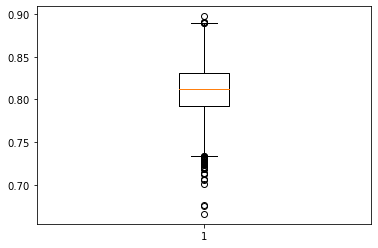

In [19]:
plt.boxplot(model_accuracies)

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as overfitting: The model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before.
In our case, most of the models simulated have a good accuracy, yet many models have low accuracy.
More can be done  by tuning the parameters

<H2> II - Decision Tree

This part is extra. I imagined a value upon which we can decide if a car is efficient or not:

* If **mpg** is > 23 then the car is Efficient
* Else the car is non efficient


<H3> First Model

Using our dataset, we will  try to predict the efficiency of a car. But first let's encode the value of **mpg** :

In [20]:
def my_function(x):
    if x>23 :
        return 'Efficient'
    else:
        return 'Non-Efficient'

df['mpg'] = df['mpg'].apply(my_function)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    object 
 1   cylinders     392 non-null    int64  
 2   engine        392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 40.6+ KB


In [22]:
df=pd.get_dummies(df, columns=["origin"])

In [23]:
Y=df['mpg']
X=df.drop(['mpg','name'],axis=1)

In [24]:
(X_train, X_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, random_state=1)

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
decision_tree_classifier = DecisionTreeClassifier()
my_tree = decision_tree_classifier.fit(X_train, y_train)
decision_tree_classifier.score(X_test, y_test)

0.8607594936708861

The score isn't steady. This is mainly related to the way we split our data inot train set and test set. we may face a problem of overfitting, that's why we opt for a cross validation.

<H3> Cross validation:

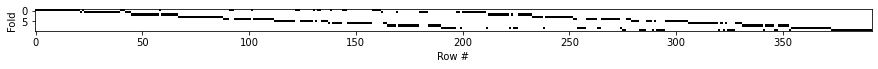

In [26]:
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), X, Y)

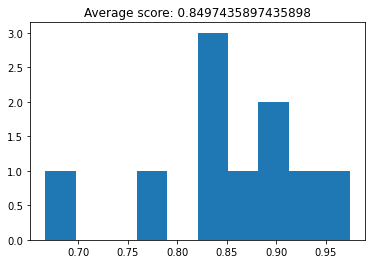

In [27]:
decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, X, Y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores))) ;

The results aren't satisfying. Maybe we need to tune the parameters.

<H3> Parameters Tuning

We will try to tune the parameters of our decision tree. We will use **Grid Seach** to find the 'perfect' combination of our parameters

In [28]:
decision_tree_classifier = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X, Y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9030769230769231
Best parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'splitter': 'best'}


In [29]:
decision_tree_classifier = grid_search.best_estimator_
print(decision_tree_classifier)

DecisionTreeClassifier(max_depth=2, max_features=2)


In [30]:
my_tree2 = decision_tree_classifier.fit(X_train, y_train)
decision_tree_classifier.score(X_test, y_test)

0.8607594936708861

<H1> Conclusion and insights

The accuracy of the results depend more on the training set we use to learn the relationship between then the variable **mpg** and the independant variables. Hence, it appears that tuning the parameters is necessary to avoid the problem of overfitting.
Also, we can think of using more algorithms to fit our model, such as Random Forest or Logistic Regression